In [1]:
##フィッティングに使うもの
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from scipy.optimize import leastsq


## 図示のために使うもの
import seaborn as sns
import matplotlib.pyplot as plt

#エクセルデータを読み込むために使う
import openpyxl

In [185]:
#x = np.arange(0, 100, 5)
x = 100 * np.random.rand(50)
print(x)

[13.89340249 94.29926815  2.04467851 27.90155506 87.8913124  10.19723188
 12.59220694 73.64377987 40.4208252  77.4329669  49.46713817 67.79324226
 88.45639123 14.67285331 69.59954871 18.03348183 27.40115562 94.2512881
 34.68159159 95.99620868 88.71724279 24.85147814 37.53287061 11.08900026
 30.90459334 25.28248624 52.84839252 28.90338081 16.59569601 81.59231956
 57.98888132 66.71971038 31.75790263 40.35629968 86.06887187 24.81405693
 72.255641    7.13432832 95.37694693 24.94364383 99.48576762 66.26137541
 54.14407177 15.43930963 72.44452943 41.30660327 26.91829328 23.36169015
 41.60182631 69.97099589]


In [214]:
y = {str(i):None for i in range(61)}
x = 100 * np.random.rand(10)
for i in range(61):
    a = (0.5 - 0.1) * np.random.rand() + 0.1
    b = (80 - 20) * np.random.rand() + 20
    m = np.exp(a*b)
    c = 90*(1+1/m)
    d = 95-c
    y[str(i)] = [c /(1+ m*np.exp( -a * j )) + np.random.normal(0,1) for j in x]
print([a,b,c,d])

[0.4209147572961235, 71.5839544719264, 90.00000000000739, 4.99999999999261]


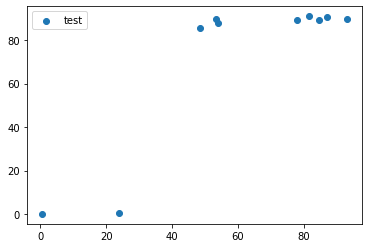

In [215]:
# プロット
#plt.plot(x, np.array(y['0']), label="test")
plt.scatter(x, np.array(y['1']), label="test")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

<AxesSubplot:>

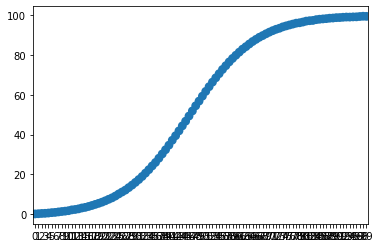

In [61]:
sns.pointplot(x=x, y=np.array(y['0']), join=False)

         0         1         2         3         4         5         6   \
0 -5.000000 -4.700000 -4.400000 -4.100000 -3.800000 -3.500000 -3.200000   
1  0.356397  0.373339  0.464528  0.402209  0.366994  0.402806  0.440791   

         7         8         9   ...        19        20       21        22  \
0 -2.900000 -2.600000 -2.300000  ...  0.700000  1.000000  1.30000  1.600000   
1  0.487149  0.462006  0.588767  ...  0.957799  1.038008  1.04699  0.936187   

         23        24        25        26        27        28  
0  1.900000  2.200000  2.500000  2.800000  3.100000  3.400000  
1  1.012447  1.085072  1.025557  0.974004  1.013599  1.018247  

[2 rows x 29 columns]
a= 2.0689907052674754
b= 3.360954331708199
c= 0.6096381125441298
d= 0.3996675996215708


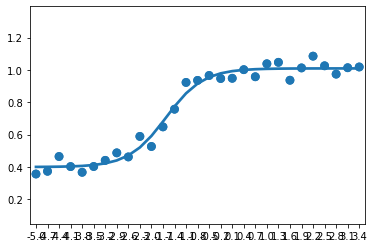

In [1]:



########エクセルデータをリストとして読み込み
# wb = openpyxl.load_workbook('C:\\temp\\foo.xlsx')
# ws = wb.worksheets[0]

# values = [ cell.value for cell in ws['C'] ]
# print(values)


#######近似対象の散布図を生成

#list_linear_x = range(-10,10,1)
list_linear_x = [i / 10 for i in range(-50, 35, 3)]
array_error = np.random.normal(size=len(list_linear_x))


array_x = np.array(list_linear_x)

list_y = {str(i):None for i in range(61)}

for i in range(61):
    a = 1
    b = 1
    c = 200*(np.exp(-b)+1)/(np.exp(-b)-1)
    d = 100-c/2
    list_y[str(i)] = [c /(1+ np.exp( -a * x - b ))+d + np.random.normal(0.4,0.05) for x in array_x]

array_y= np.array(list_y)
sns.pointplot(x=array_x, y=array_y, join=False)

##散布図のデータをエクセル化
data=[array_x.T, array_y.T]
df=pd.DataFrame(data)
print(df)
df.to_excel('data.xlsx')

########非線形最小二乗法（curve_fitを用いた場合）

def nonlinear_fit(x,a,b,c,d):
    return  c /(1+ np.exp( -x * a - b ))+d

param, cov = curve_fit(nonlinear_fit, array_x, array_y)

list_y2 = []
for num in array_x:
    list_y2.append( param[2] /(1+ np.exp( -num * param[0] - param[1] ))+param[3] )

sns.pointplot(x=array_x, y=array_y, join=False)
sns.pointplot(x=array_x, y=np.array(list_y2), markers="")

print('a=',param[0])
print('b=',param[1])
print('c=',param[2])
print('d=',param[3])



########非線形最小二乗法（leastsqを用いた場合）

# def objectiveFunction(x,a,b,c,d):
#     r = y -( c /(1+ np.exp( -x * a - b ))+d )
#     return r

# initialValue = np.array([1,1,1,1])
# betaID = leastsq(objectiveFunction, initialValue,args=(array_x))

# plt.figure()
# plt.plot(array_x, array_y, 'r.')
# plt.plot(array_x, theoreticalValue(betaID[0]), 'b')
# plt.show()